Boston House Prices Dataset:
- https://www.kaggle.com/datasets/arunjathari/bostonhousepricedata

Loading the Libraries Needed

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pylab
import scipy.stats as stats

Importing the Boston House Dataset

In [3]:
df = pd.read_csv("./dataset/boston-house-price-data.csv")

Checking the Dataset

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.shape

(506, 14)

In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

There is Not NA or Null Values in the Dataset

<Axes: >

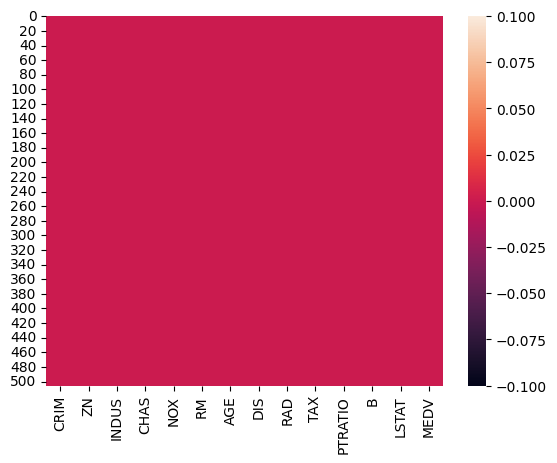

In [9]:
sns.heatmap(df.isnull())

<Axes: >

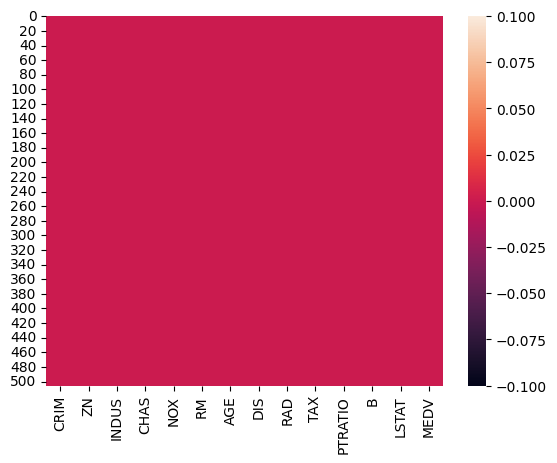

In [10]:
sns.heatmap(df.isna())

<Axes: >

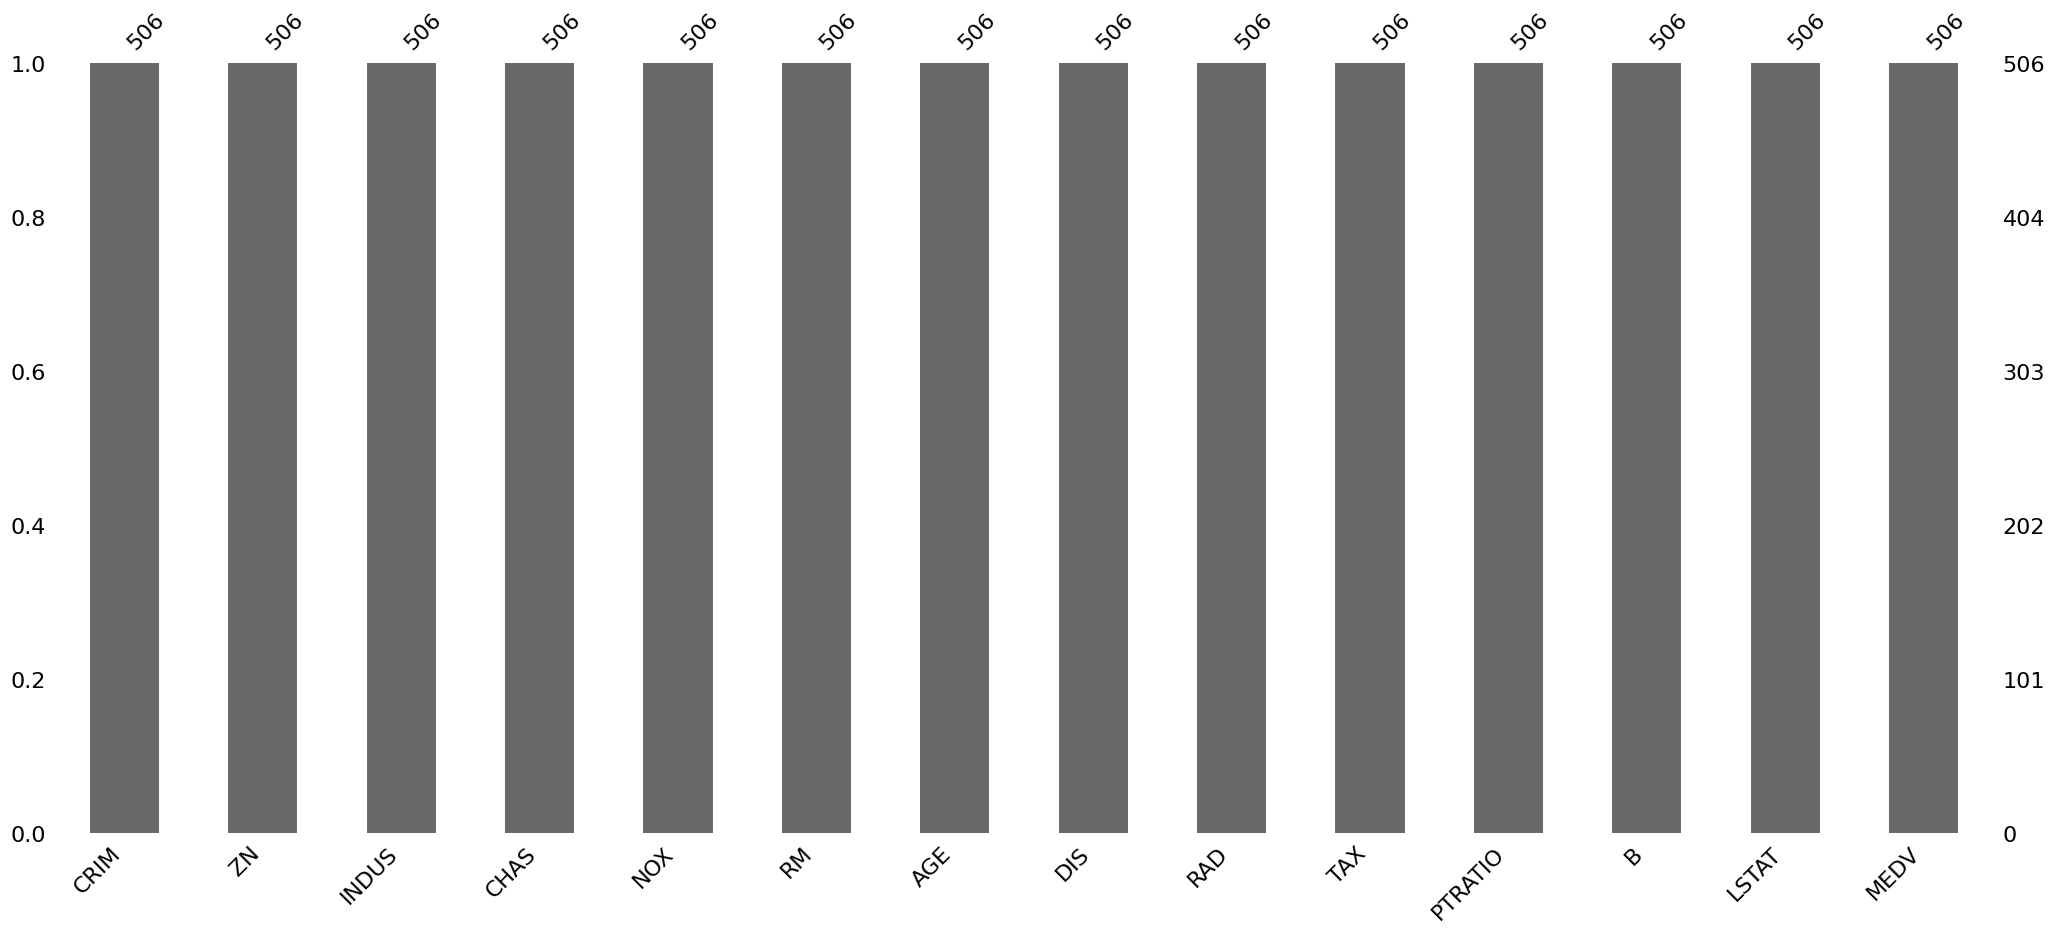

In [11]:
msno.bar(df)

Heatmap of the Dataset

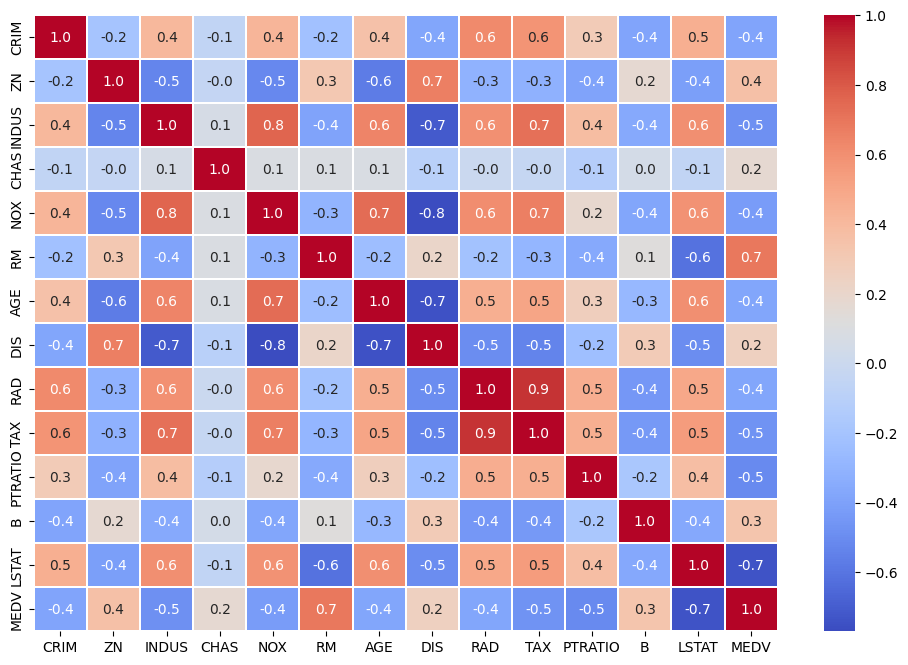

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [13]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

Splitting the Data to Train and Test Datasets, and then Each X Feature is going to be Scaled

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

Importing the RandomForestRegressor Algorithm and Testing what is the best number of estimators

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [18]:
def get_score(n_estimators) :
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=100)

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred)

    return MAE.mean()

In [19]:
random_forest_tree_numbers = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

results = {}

for i in random_forest_tree_numbers :
    result = get_score(i)
    results[i] = result

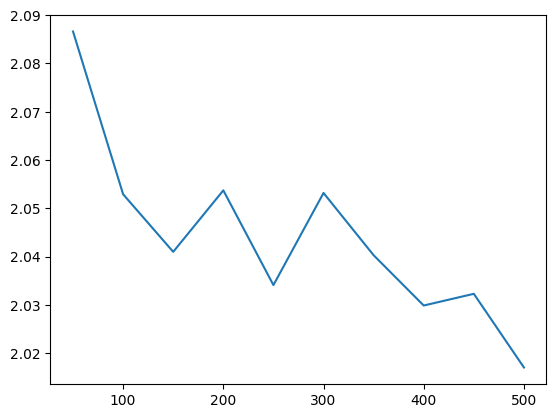

In [20]:
plt.plot(list(results.keys()), list(results.values()))
plt.show()

The Best number of estimators of the RandomForestRegressor is 500, so this is the model that is going to be trained with that parameter.

In [21]:
best_random_forest = RandomForestRegressor(n_estimators=500, random_state=100)

best_random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=100)

RandomForestRegressor Validation Results

In [22]:
y_pred = best_random_forest.predict(X_test)

print("Test Score:" + str(best_random_forest.score(X_test, y_test)))

random_forest_mae = mean_absolute_error(y_test, y_pred)

print("MAE: " + str(random_forest_mae))

print("R2 Score: " + str(r2_score(y_test, y_pred)))

random_forest_acc = best_random_forest.score(X_test, y_test)

Test Score:0.8818081275653127
MAE: 2.017013725490187
R2 Score: 0.8818081275653127


Text(0.5, 1.0, 'Evaluation of the RandomForestRegressor Model')

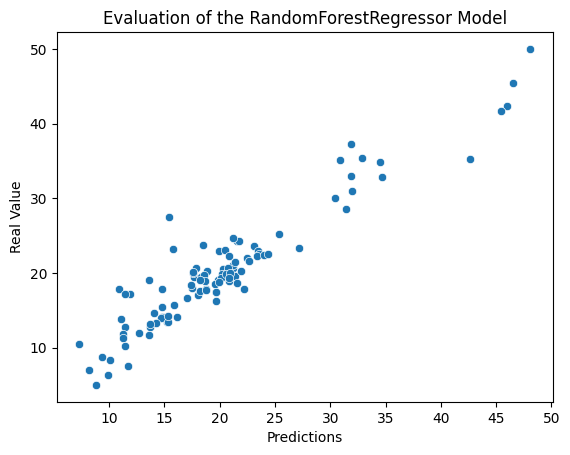

In [23]:
sns.scatterplot(x=y_pred,y=y_test)
plt.xlabel("Predictions")
plt.ylabel("Real Value")
plt.title("Evaluation of the RandomForestRegressor Model")

In [24]:
residuals_rf = y_test - y_pred

In [25]:
residuals_rf

159   -3.8682
439    1.3610
399   -3.5780
273   -7.4658
137   -0.9086
        ...  
461   -1.0924
328   -1.5222
149    0.6264
133    0.9632
315   -3.4448
Name: MEDV, Length: 102, dtype: float64

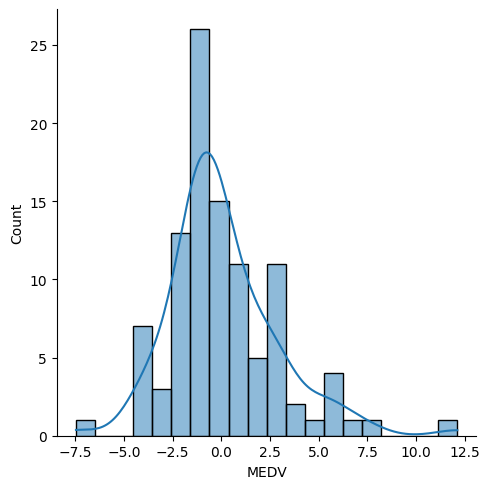

In [26]:
sns.displot(residuals_rf, bins = 20, kde = True)

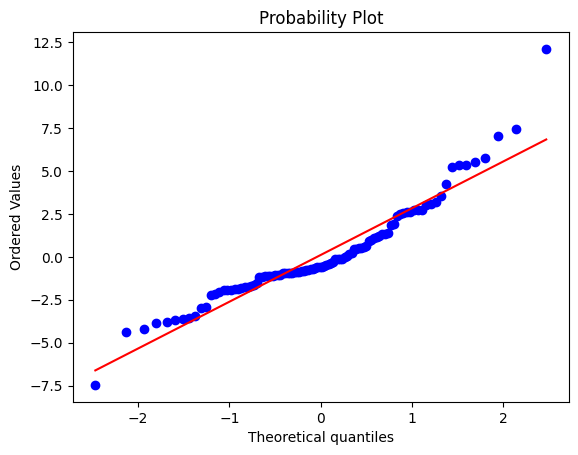

In [27]:
stats.probplot(residuals_rf, dist="norm", plot=pylab)
pylab.show()

Importing XGBRegressor Algorithm

In [28]:
from xgboost import XGBRegressor

In [29]:
xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.05)

In [30]:
xgb_model.fit(X_train, y_train, 
             eval_set=[(X_test, y_test)], 
             verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

XGBRegressor Validation Results

In [31]:
predictions = xgb_model.predict(X_test)

print("Test Score: " + str(xgb_model.score(X_test, y_test)))

print("MAE: " + str(mean_absolute_error(y_test, predictions)))

print("R2 Score: " + str(r2_score(y_test, predictions)))

xgb_regressor_mae = mean_absolute_error(y_test, predictions)
xgb_regressor_acc = xgb_model.score(X_test, y_test)

Test Score: 0.8921031133547368
MAE: 1.909842861399931
R2 Score: 0.8921031133547368


Text(0.5, 1.0, 'Evaluation of the XGBRegressor Model')

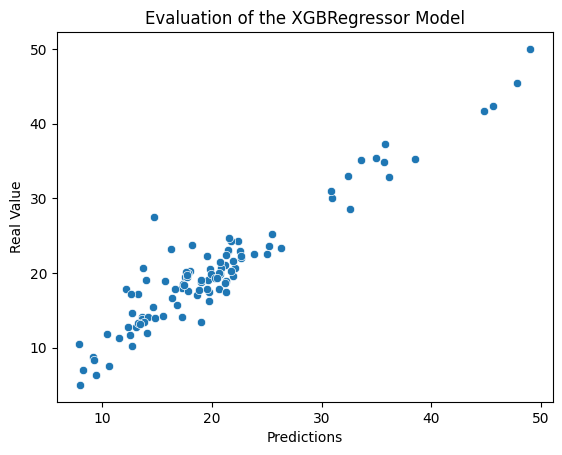

In [32]:
sns.scatterplot(x=predictions,y=y_test)
plt.xlabel("Predictions")
plt.ylabel("Real Value")
plt.title("Evaluation of the XGBRegressor Model")

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [34]:
print("Mean Absolute Error", mean_absolute_error(y_test, predictions))
print("Mean Squared Error", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error 1.909842861399931
Mean Squared Error 7.140625602945588
Root Mean Squared Error 2.6721949036224113


In [35]:
residuals_xgb = y_test - predictions

In [36]:
residuals_xgb

159   -2.943181
439    0.428864
399   -3.144289
273   -3.301007
137   -1.500574
         ...   
461   -1.099772
328   -1.102569
149    0.762466
133    0.974310
315   -3.511460
Name: MEDV, Length: 102, dtype: float64

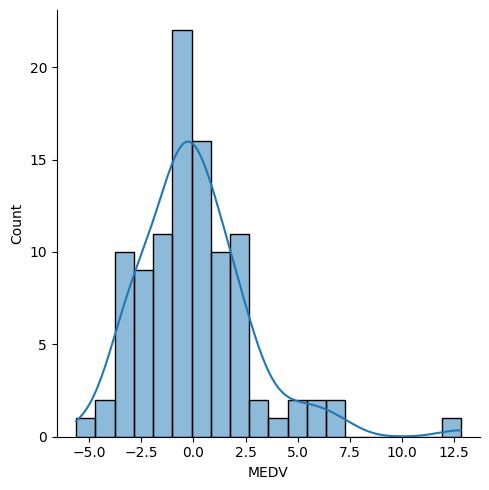

In [37]:
sns.displot(residuals_xgb, bins = 20, kde = True)

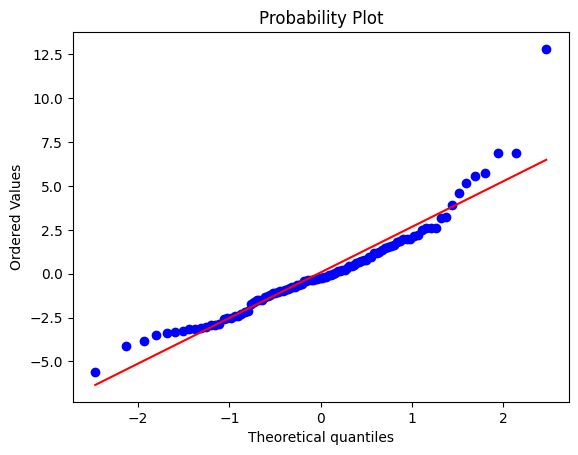

In [38]:
stats.probplot(residuals_xgb, dist="norm", plot=pylab)
pylab.show()

Importing LinearRegression Algorithm

In [39]:
from sklearn.linear_model import LinearRegression

LinearRegression Validation Results

In [40]:
simple_model = LinearRegression()

simple_model.fit(X_train, y_train)

y_pred = simple_model.predict(X_test)

print("Test Score:" + str(simple_model.score(X_test, y_test)))

lr_mae = mean_absolute_error(y_test, y_pred)

print("MAE: " + str(lr_mae))

print("R2 Score: " + str(r2_score(y_test, y_pred)))

lr_acc = simple_model.score(X_test, y_test)

Test Score:0.645944722201767
MAE: 3.530771211668478
R2 Score: 0.645944722201767


Text(0.5, 1.0, 'Evaluation of the Linear Regression Model')

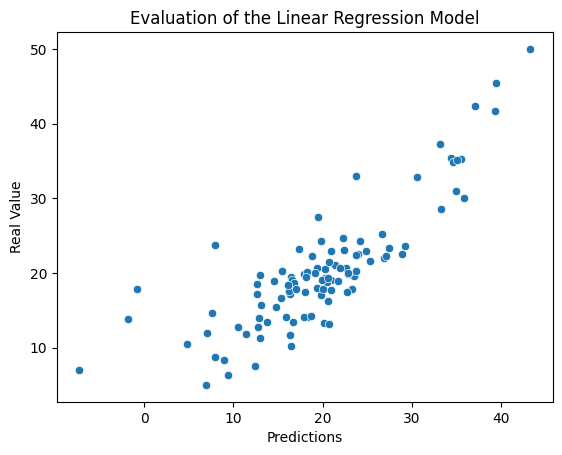

In [41]:
sns.scatterplot(x=y_pred,y=y_test)
plt.xlabel("Predictions")
plt.ylabel("Real Value")
plt.title("Evaluation of the Linear Regression Model")

In [42]:
residuals_lr = y_test - y_pred

In [43]:
residuals_lr

159   -4.127810
439    0.002710
399   -3.130748
273   -0.266425
137   -2.766635
         ...   
461   -3.272786
328   -1.287605
149    0.585877
133    2.284377
315   -4.374754
Name: MEDV, Length: 102, dtype: float64

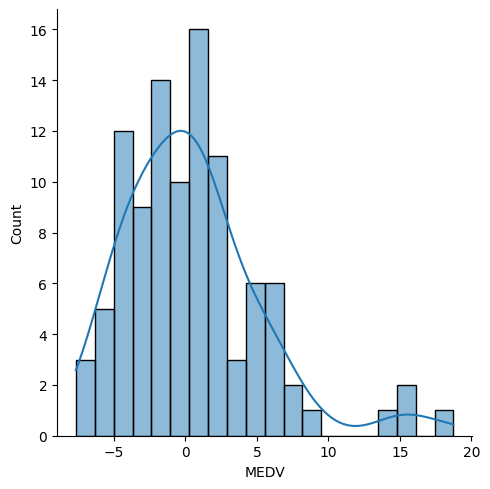

In [44]:
sns.displot(residuals_lr, bins = 20, kde = True)

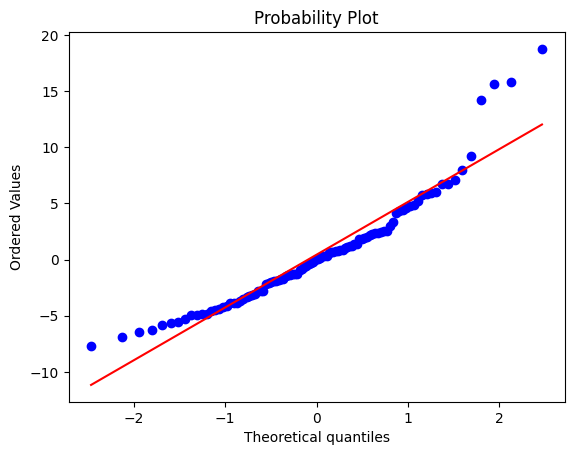

In [45]:
stats.probplot(residuals_lr, dist="norm", plot=pylab)
pylab.show()

In [50]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_acc*100, random_forest_acc*100, xgb_regressor_acc*100],
    'Mean Absolute Error': [lr_mae, random_forest_mae, xgb_regressor_mae]})

models.sort_values(by='Mean Absolute Error', ascending=True)

,Model,Accuracy,Mean Absolute Error
2,XGBoost,89.210311,1.909843
1,Random Forest,88.180813,2.017014
0,Linear Regression,64.594472,3.530771


The XGBRegressor did the best results, with an accuracy of 89%, so this Model is going to be saved with also the Scaler

In [47]:
import pickle as pkl

In [48]:
pkl.dump(scaler, open(f"./model/scaler.pkl", "wb"))

In [49]:
pkl.dump(xgb_model, open(f"./model/boston_house_price_model.pkl", "wb"))